## Task-4: SALES PRICE PREDICTION USING PYTHON

## Data Preparation

In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv("Advertising.csv")

In [3]:
df.head()

,index,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
#removeing the index cleaning
df=df.drop('index',axis=1)

In [5]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [6]:
df.shape

(200, 4)

## Data Cleaning

In [7]:
#Checking null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### There are no null values

In [8]:
#checking missing values
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### There are no missing values

## Exploratory Data Analysis

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


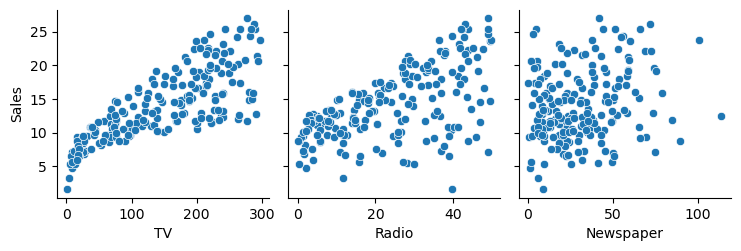

In [12]:
# Visualizing the relationships between variables
sns.pairplot(df, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', kind='scatter')
plt.show()

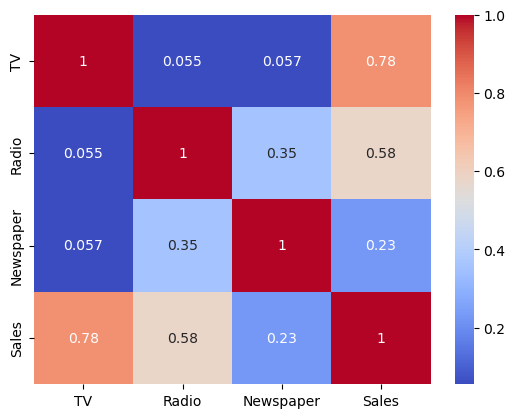

In [13]:
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### The given Features are equally correlated to sales

## Model Training

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
#Spliting the data
X = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

In [16]:
#Training the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

## Linear Regression Model

In [17]:
# Creating and training the linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [18]:
linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression()

Mean absolute error 1.4023124989385074
R2 Score 0.8935163320163658


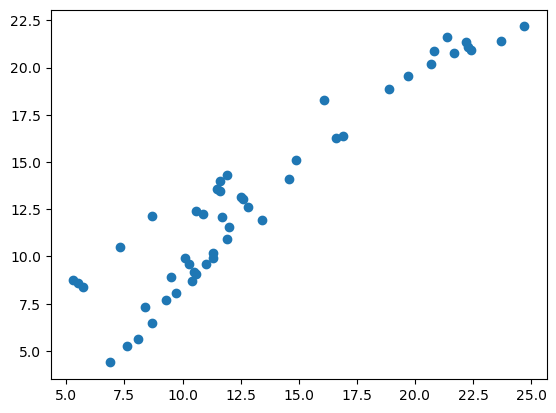

In [19]:
# Making predictions on the test set
y_pred = linear.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Lasso Regression

In [20]:
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(X_train,y_train)

Lasso()

Mean absolute error 1.3875302429453518
R2 Score 0.8951947205229303


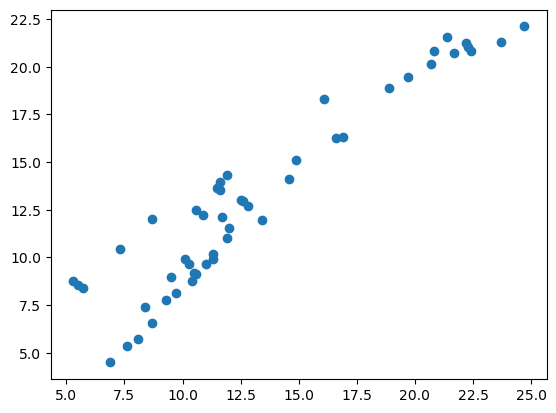

In [21]:
y_pred=lasso.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Ridge Regression 

In [22]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)

Ridge()

Mean absolute error 1.4023136454046168
R2 Score 0.8935173307476478


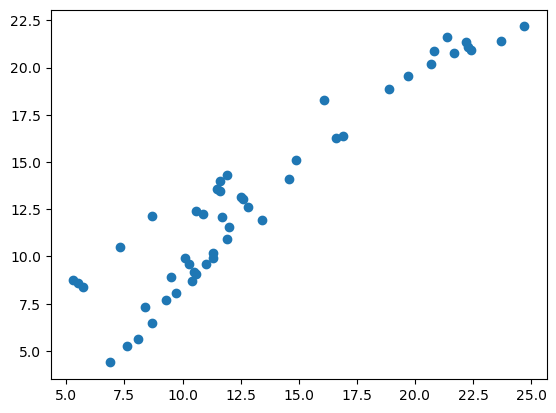

In [23]:
y_pred=ridge.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

## Elastic Net Regression

In [24]:
from sklearn.linear_model import ElasticNet
elastic=ElasticNet()
elastic.fit(X_train,y_train)

ElasticNet()

Mean absolute error 1.395009918538284
R2 Score 0.8944658510225635


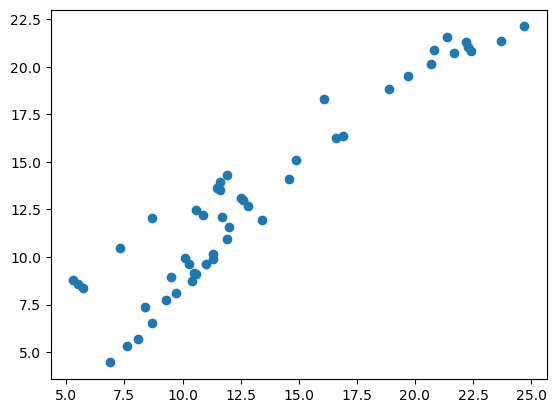

In [25]:
y_pred=elastic.predict(X_test)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)
plt.scatter(y_test,y_pred)

### From the linear models we can observe that Lasso regression gives the highest accuracy score of 89.5%